In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# ! pip install sdv

In [3]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
import pandas as pd
import numpy as np

In [5]:
# read csv file as dataframe, and drop ROW_ID column
def read_csv_no_rowid(file_path):
    df = pd.read_csv(file_path)
    df.drop(["Unnamed: 0", 'row_id'], axis=1, inplace=True)

    return df

In [6]:
# check NaN value

def nan_count(df):
    print("Total columns: " + str(len(df.columns)))
    print("Total rows: " + str(len(df)))
    print("--------------")
    print(df.isnull().sum())

In [7]:
date_set_path = "../temp_sets/"

In [8]:
microbiologyevents_sample_df = read_csv_no_rowid(date_set_path + "microbiologyevents.csv")

In [9]:
microbiologyevents_sample_df.head()

,subject_id,hadm_id,chartdate,charttime,spec_itemid,spec_type_desc,org_itemid,org_name,isolate_num,ab_itemid,ab_name,dilution_text,dilution_comparison,dilution_value,interpretation
0,11290,137961,2173-11-19 00:00:00,2173-11-19 19:30:00,70014.0,BLOOD CULTURE - NEONATE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11290,137961,2173-11-22 00:00:00,2173-11-22 12:40:00,70014.0,BLOOD CULTURE - NEONATE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,48637,148117,2133-06-08 00:00:00,2133-06-08 21:20:00,70091.0,MRSA SCREEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,48637,148117,2133-06-12 00:00:00,2133-06-12 04:28:00,70091.0,MRSA SCREEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,48637,148117,2133-06-12 00:00:00,2133-06-12 15:00:00,70079.0,URINE,80058.0,GRAM NEGATIVE ROD(S),1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Drop some null value
microbiologyevents_sample_df.dropna(subset=['subject_id', 'hadm_id', 'spec_itemid'], inplace=True, axis=0)

In [11]:
# Drop some columns
# microbiologyevents_sample_df.drop(['chartdate'], axis=1, inplace=True)

In [12]:
nan_count(microbiologyevents_sample_df)

Total columns: 15
Total rows: 14483
--------------
subject_id                0
hadm_id                   0
chartdate                 0
charttime               997
spec_itemid               0
spec_type_desc            0
org_itemid             7211
org_name               7182
isolate_num            7182
ab_itemid              8387
ab_name                8387
dilution_text          8578
dilution_comparison    8582
dilution_value         8582
interpretation         8387
dtype: int64


In [13]:
# Deal with null values
microbiologyevents_sample_df['charttime'].fillna(microbiologyevents_sample_df['chartdate'], inplace=True)

microbiologyevents_sample_df['org_itemid'].fillna(value=0, inplace=True)
microbiologyevents_sample_df['isolate_num'].fillna(value=0, inplace=True)
microbiologyevents_sample_df['ab_itemid'].fillna(value=0, inplace=True)

microbiologyevents_sample_df['org_name'].fillna(value='Na', inplace=True)
microbiologyevents_sample_df['ab_name'].fillna(value='Na', inplace=True)
microbiologyevents_sample_df['dilution_comparison'].fillna(value='Na', inplace=True)
microbiologyevents_sample_df['org_name'].fillna(value='Na', inplace=True)

microbiologyevents_sample_df['dilution_value'].fillna(value=999, inplace=True)

In [14]:
# Drop some columns. This cell must be below of Deal with null values
microbiologyevents_sample_df.drop(['chartdate'], axis=1, inplace=True)

In [15]:
microbiologyevents_sample_df.loc[microbiologyevents_sample_df['hadm_id']==107657,:]

,subject_id,hadm_id,charttime,spec_itemid,spec_type_desc,org_itemid,org_name,isolate_num,ab_itemid,ab_name,dilution_text,dilution_comparison,dilution_value,interpretation
17,9216,107657,2199-04-05 17:45:00,70012.0,BLOOD CULTURE,0.0,Na,0.0,0.0,Na,NaN,Na,999.0,NaN
18,9216,107657,2199-04-05 21:45:00,70079.0,URINE,0.0,Na,0.0,0.0,Na,NaN,Na,999.0,NaN
19,9216,107657,2199-04-05 00:00:00,70012.0,BLOOD CULTURE,0.0,Na,0.0,0.0,Na,NaN,Na,999.0,NaN
20,9216,107657,2199-04-07 21:36:00,70012.0,BLOOD CULTURE,0.0,Na,0.0,0.0,Na,NaN,Na,999.0,NaN
21,9216,107657,2199-04-07 21:37:00,70012.0,BLOOD CULTURE,0.0,Na,0.0,0.0,Na,NaN,Na,999.0,NaN
22,9216,107657,2199-04-10 15:45:00,70023.0,CATHETER TIP-IV,0.0,Na,0.0,0.0,Na,NaN,Na,999.0,NaN


In [16]:
microbiologyevents_sample_df.dtypes

subject_id               int64
hadm_id                  int64
charttime               object
spec_itemid            float64
spec_type_desc          object
org_itemid             float64
org_name                object
isolate_num            float64
ab_itemid              float64
ab_name                 object
dilution_text           object
dilution_comparison     object
dilution_value         float64
interpretation          object
dtype: object

In [17]:
microbiologyevents_sample_df['charttime'] = pd.to_datetime(microbiologyevents_sample_df['charttime'])
microbiologyevents_sample_df['spec_itemid'] = microbiologyevents_sample_df['spec_itemid'].astype(int)
microbiologyevents_sample_df['org_itemid'] = microbiologyevents_sample_df['org_itemid'].astype(int)
microbiologyevents_sample_df['isolate_num'] = microbiologyevents_sample_df['isolate_num'].astype(int)
microbiologyevents_sample_df['ab_itemid'] = microbiologyevents_sample_df['ab_itemid'].astype(int)

In [18]:
microbiologyevents_sample_df.dtypes

subject_id                      int64
hadm_id                         int64
charttime              datetime64[ns]
spec_itemid                     int32
spec_type_desc                 object
org_itemid                      int32
org_name                       object
isolate_num                     int32
ab_itemid                       int32
ab_name                        object
dilution_text                  object
dilution_comparison            object
dilution_value                float64
interpretation                 object
dtype: object

In [19]:
len(microbiologyevents_sample_df)

14483

---

## Build model

In [20]:
from sdv.tabular import CTGAN
from sdv.evaluation import evaluate
from sdv.constraints import FixedCombinations
from sdv.constraints import Inequality

In [21]:
microbiologyevents_sample_df.columns

Index(['subject_id', 'hadm_id', 'charttime', 'spec_itemid', 'spec_type_desc',
       'org_itemid', 'org_name', 'isolate_num', 'ab_itemid', 'ab_name',
       'dilution_text', 'dilution_comparison', 'dilution_value',
       'interpretation'],
      dtype='object')

In [22]:
fixed_subject_hadm_constraint = FixedCombinations(
    column_names=['subject_id', 'hadm_id']
)
fixed_org_itemid_org_name_constraint = FixedCombinations(
    column_names=['org_itemid', 'org_name']
)
fixed_itemid_value_valueuom_constraint = FixedCombinations(
    column_names=['spec_itemid', 'spec_type_desc']
)
fixed_dilution_constraint = FixedCombinations(
    column_names=['ab_itemid', 'ab_name', 'dilution_text', 'dilution_comparison', 'dilution_value']
)

In [23]:
microbiologyevents_constraints = [fixed_subject_hadm_constraint, fixed_org_itemid_org_name_constraint, fixed_itemid_value_valueuom_constraint, fixed_dilution_constraint]

In [34]:
model = CTGAN(
    constraints=microbiologyevents_constraints, 
    batch_size=1000,
    generator_lr=0.0005,
    discriminator_lr=0.0005,
    cuda=True, 
    verbose=True, 
    epochs=200)

In [35]:
len(microbiologyevents_sample_df)

14483

In [36]:
train_data = microbiologyevents_sample_df.loc[0:1000, : ]
model.fit(train_data)

Epoch 1, Loss G:  3.5513,Loss D: -0.0020
Epoch 2, Loss G:  3.5096,Loss D: -0.0254
Epoch 3, Loss G:  3.4357,Loss D: -0.0585
Epoch 4, Loss G:  3.4447,Loss D: -0.1068
Epoch 5, Loss G:  3.3458,Loss D: -0.1579
Epoch 6, Loss G:  3.3339,Loss D: -0.2201
Epoch 7, Loss G:  3.3163,Loss D: -0.2776
Epoch 8, Loss G:  3.2732,Loss D: -0.3298
Epoch 9, Loss G:  3.2327,Loss D: -0.3607
Epoch 10, Loss G:  3.1740,Loss D: -0.3378
Epoch 11, Loss G:  3.2561,Loss D: -0.2927
Epoch 12, Loss G:  3.1637,Loss D: -0.3372
Epoch 13, Loss G:  3.2453,Loss D: -0.3405
Epoch 14, Loss G:  3.1815,Loss D: -0.3144
Epoch 15, Loss G:  3.1719,Loss D: -0.3897
Epoch 16, Loss G:  3.0894,Loss D: -0.3891
Epoch 17, Loss G:  3.1674,Loss D: -0.3686
Epoch 18, Loss G:  3.1641,Loss D: -0.4273
Epoch 19, Loss G:  3.1487,Loss D: -0.4378
Epoch 20, Loss G:  3.2382,Loss D: -0.3730
Epoch 21, Loss G:  3.1462,Loss D: -0.3564
Epoch 22, Loss G:  3.1065,Loss D: -0.2939
Epoch 23, Loss G:  2.9955,Loss D: -0.2463
Epoch 24, Loss G:  2.8754,Loss D: -0.1367
E

In [37]:
model.save("../microbiologyevents_model.pkl")

In [38]:
# model = CTGAN.load(("/content/drive/MyDrive/MSc Project/microbiologyevents_model.pkl"))

In [39]:
sample = model.sample(num_rows=1000)

Sampling rows: 100%|██████████| 1000/1000 [00:00<00:00, 9291.73it/s]


In [40]:
len(sample)

1000

In [41]:
nan_count(sample)

Total columns: 14
Total rows: 1000
--------------
subject_id               0
hadm_id                  0
charttime                0
spec_itemid              0
spec_type_desc           0
org_itemid               0
org_name                 0
isolate_num              0
ab_itemid                0
ab_name                  0
dilution_text          331
dilution_comparison      0
dilution_value           0
interpretation         194
dtype: int64


In [42]:
sample.dtypes

subject_id                      int64
hadm_id                         int64
charttime              datetime64[ns]
spec_itemid                     int32
spec_type_desc                 object
org_itemid                      int32
org_name                       object
isolate_num                     int32
ab_itemid                       int32
ab_name                        object
dilution_text                  object
dilution_comparison            object
dilution_value                float64
interpretation                 object
dtype: object

In [43]:
evaluate(sample, train_data, metrics=['ContinuousKLDivergence'])

0.6016321203556886

In [44]:
evaluate(sample, train_data, metrics=['DiscreteKLDivergence'])

0.28559363655220193

<AxesSubplot:xlabel='spec_itemid', ylabel='spec_type_desc'>

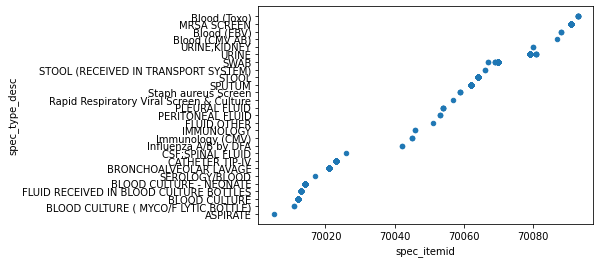

In [45]:
sample.sort_values('spec_itemid').plot(x='spec_itemid', y='spec_type_desc', kind='scatter')

<AxesSubplot:xlabel='spec_itemid', ylabel='spec_type_desc'>

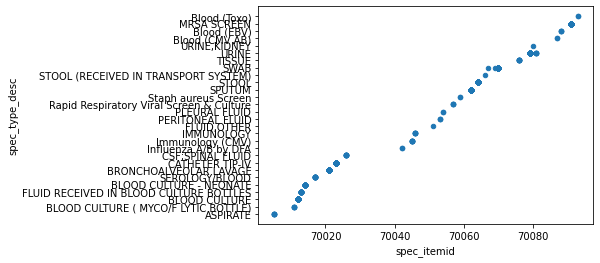

In [46]:
train_data.sort_values('spec_itemid').plot(x='spec_itemid', y='spec_type_desc', kind='scatter')

<AxesSubplot:>

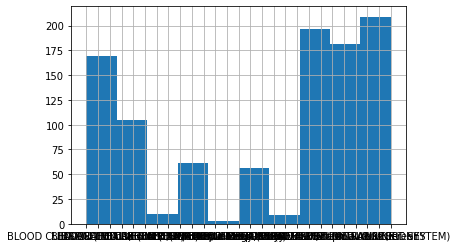

In [47]:
sample.sort_values('spec_type_desc')['spec_type_desc'].hist()

<AxesSubplot:>

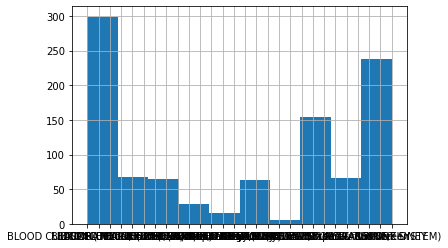

In [48]:
train_data.sort_values('spec_type_desc')['spec_type_desc'].hist()

In [76]:
# evaluate(sample, train_data, aggregate=False)